# Convolution Examples

Goal: To understand the concept of convolution operation in Neural Network Modelling

- It is masking operation
- It is not the convolution being used in signal processing. It is correlation.
- When you hear 'convolution' at some place, be careful and must identify the subject first.
---
## Channel Arithmatic
- 1 channel input * 1 channel kernel/filter/mask = 1 channel output
- 1 channel input * 2 channel kernel/filter/mask = 2 channel output (equivalent to two separate filters)
- 2 channel input * 2 channel kernel/filter/mask = 1 channel output (since input is of 2 channel, the filter must have 2 channels)
- 2 channel input * 1 channel kernel/filter/mask : impossible

In [75]:
import torch
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.datasets

In [76]:
%matplotlib inline

## 1-Dimensional Convolution

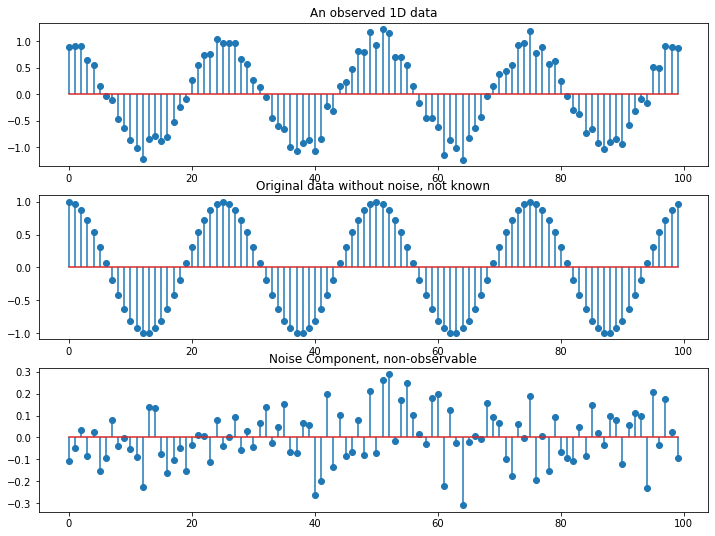

In [77]:
data_len = 100
t = torch.arange(data_len).float()
Period = 25
noise = torch.randn_like(t)*0.1
data1d_wo = torch.cos( t*2*np.pi/Period )
data1d = data1d_wo + noise

fig, ax = plt.subplots(3,1,figsize=(12,9))
ax[0].set_title('An observed 1D data')
ax[0].stem(t, data1d, use_line_collection=True)
ax[1].set_title('Original data without noise, not known')
ax[1].stem(t, data1d_wo, use_line_collection=True)
ax[2].set_title('Noise Component, non-observable')
ax[2].stem(t, noise, use_line_collection=True);

## PyTorch interface for convolution
- Input shape: BxCxF

In [78]:
data1d = data1d.reshape(1,1,-1)
print(data1d.shape, 'BxCxF -  A 1 channel input data')

torch.Size([1, 1, 100]) BxCxF -  A 1 channel input data


## Smoothing by 1D masking/filtering
- Smoothing filter removes abrupt chanes along the feature domain.
- simple mask operation results in a reduction of the size of the output
- padding

In [79]:
mask_size = 15
mask1d = torch.ones(1,1,mask_size)/mask_size
print('mask1d:', mask1d)

conv1d_output = torch.nn.functional.conv1d(data1d, mask1d)
print(f'conv1d_output: {conv1d_output.shape}')
print('>>> The output shape is different from the size of input')
print(f'>>> The size = {data1d.shape[2]} - ({mask_size} - 1) = {data1d.shape[2]-(mask_size-1)}')

conv1d_output = torch.nn.functional.conv1d(data1d, mask1d, padding=mask_size//2)
print(f'\nconv1d_output: {conv1d_output.shape} with padding size {mask_size//2}')
print('>>> The output shape is the same as that of input after using padding=mask_size//2')


mask1d: tensor([[[0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667,
          0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667]]])
conv1d_output: torch.Size([1, 1, 86])
>>> The output shape is different from the size of input
>>> The size = 100 - (15 - 1) = 86

conv1d_output: torch.Size([1, 1, 100]) with padding size 7
>>> The output shape is the same as that of input after using padding=mask_size//2


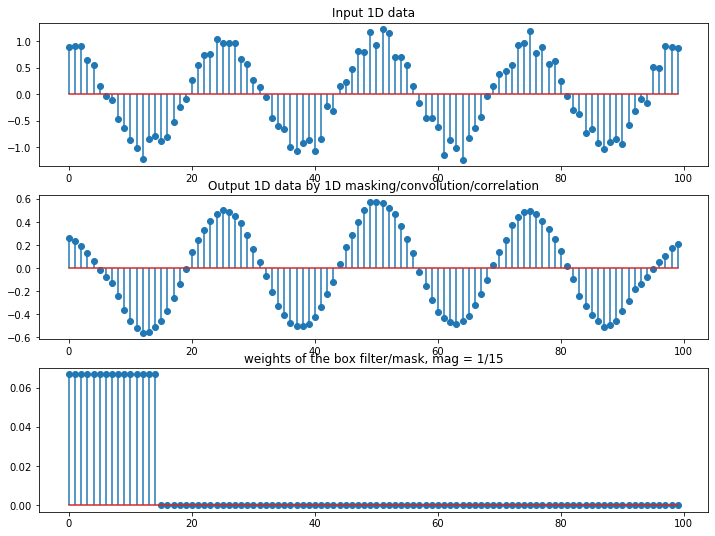

In [80]:
fig, ax = plt.subplots(3,1,figsize=(12,9))
ax[0].set_title('Input 1D data')
ax[0].stem(t, data1d[0,0], use_line_collection=True)
ax[1].set_title('Output 1D data by 1D masking/convolution/correlation')
ax[1].stem(t, conv1d_output[0,0,:], use_line_collection=True)
ax[2].set_title(f'weights of the box filter/mask, mag = 1/{mask_size}')
mask1d_imsi = torch.zeros_like(data1d)
mask1d_imsi[0,0,:mask_size] = mask1d
ax[2].stem(t, mask1d_imsi[0,0], use_line_collection=True);

#### Overlay of the source and the filtered output

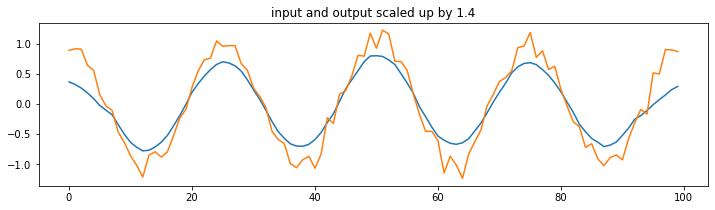

In [81]:
# try 2 instead of 1.4
volume_up=1.4
plt.figure(figsize=(12,3))
plt.plot(conv1d_output[0,0]*volume_up)
plt.plot(data1d[0,0])
plt.title(f'input and output scaled up by {volume_up}');

## Difference Filter with Conv1D
- detects the places of large change

In [97]:
diff_filter = torch.tensor([-.5, -1, 0, 1, .5]).reshape(1,1,5)

diff_filter

tensor([[[-0.5000, -1.0000,  0.0000,  1.0000,  0.5000]]])

#### Let's make a pulse shape data

torch.Size([1, 1, 100]) torch.Size([1, 1, 100])


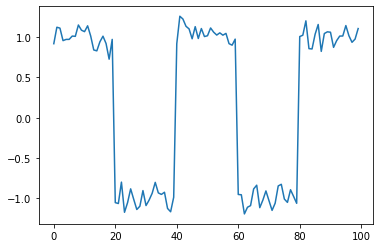

In [101]:
data1d_2 = data1d.clone() #torch.ones((1,1,data_len))
print(data1d_2.shape, data1d.shape)
val = 1
for i in range(0, data_len, 20):
    data1d_2[0,0,i:i+20] = val
    val *= -1
data1d_2 +=  0.1*torch.randn_like(data1d_2)
plt.plot(data1d_2[0,0])

### apply mask operation/convolution

In [102]:
conv1d_diff_output = torch.nn.functional.conv1d(data1d_2, diff_filter, padding=diff_filter.shape[2]//2)
conv1d_diff_output.shape

torch.Size([1, 1, 100])

### result plot

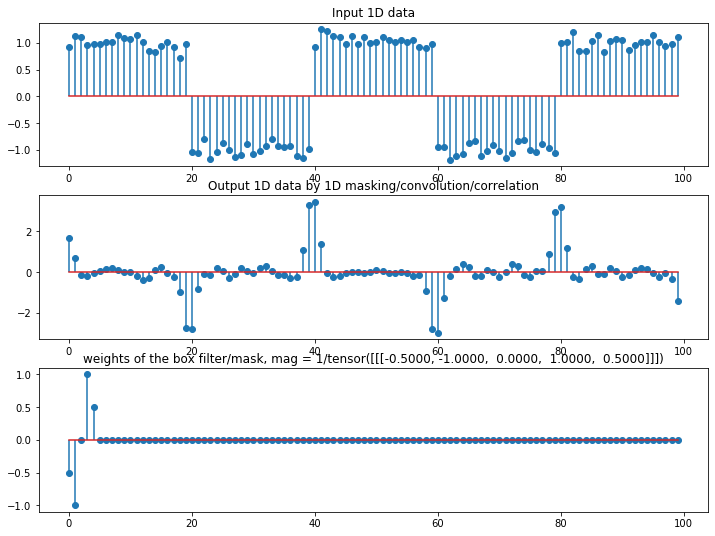

In [103]:
fig, ax = plt.subplots(3,1,figsize=(12,9))
ax[0].set_title('Input 1D data')
ax[0].stem(t, data1d_2[0,0], use_line_collection=True)
ax[1].set_title('Output 1D data by 1D masking/convolution/correlation')
ax[1].stem(t, conv1d_diff_output[0,0,:], use_line_collection=True)
ax[2].set_title(f'weights of the box filter/mask, mag = 1/{diff_filter}')
imsi = torch.zeros_like(data1d)
imsi[0,0,:diff_filter.shape[2]] = diff_filter
ax[2].stem(t, imsi[0,0], use_line_collection=True);

### Apply Smoothing to the same data

In [107]:
conv1d_mask1d_output = torch.nn.functional.conv1d(data1d_2, mask1d, padding=mask1d.shape[2]//2)

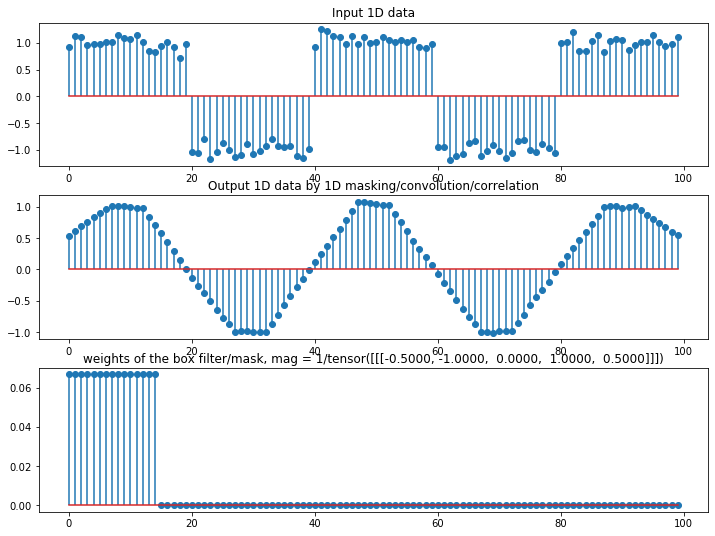

In [110]:
fig, ax = plt.subplots(3,1,figsize=(12,9))
ax[0].set_title('Input 1D data')
ax[0].stem(t, data1d_2[0,0], use_line_collection=True)
ax[1].set_title('Output 1D data by 1D masking/convolution/correlation')
ax[1].stem(t, conv1d_mask1d_output[0,0,:], use_line_collection=True)
ax[2].set_title(f'weights of the box filter/mask, mag = 1/{diff_filter}')
imsi = torch.zeros_like(data1d)
imsi[0,0,:mask1d.shape[2]] = mask1d
ax[2].stem(t, imsi[0,0], use_line_collection=True);

### We produced two outputs using two filters applied to a 1d data/signal
- we can make a 2 channel filter and perform the two convolution in one line of code

#### first, let's make a two-channel filter

In [140]:
n_outputs = 2
in_channels = 1
weight_size = mask1d.shape[2]
filter_2ch = torch.zeros(n_outputs, in_channels, weight_size)
filter_2ch[0,:,:] = mask1d[0]
filter_2ch[1,:,:diff_filter.shape[2]] = diff_filter[0]
filter_2ch

tensor([[[ 0.0667,  0.0667,  0.0667,  0.0667,  0.0667,  0.0667,  0.0667,
           0.0667,  0.0667,  0.0667,  0.0667,  0.0667,  0.0667,  0.0667,
           0.0667]],

        [[-0.5000, -1.0000,  0.0000,  1.0000,  0.5000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000]]])

#### apply conv1d with the filter weights 

In [141]:
conv1d_2ch_output = torch.nn.functional.conv1d(data1d_2, filter_2ch, padding=filter_2ch_out.shape[2]//2)
print(conv1d_2ch_output.shape)

torch.Size([1, 2, 100])


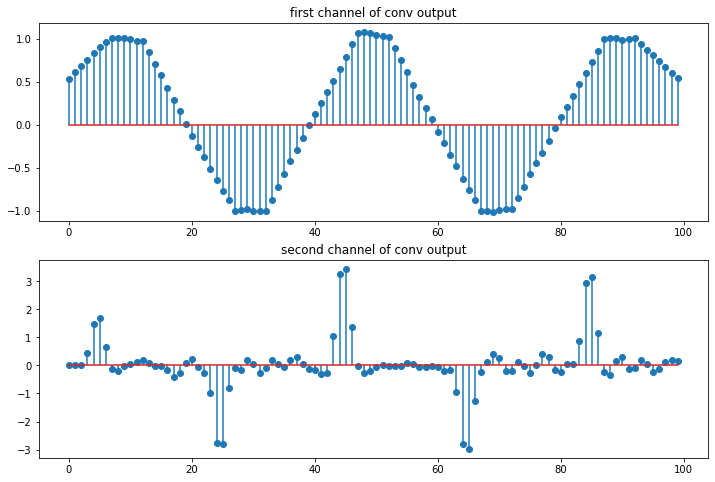

In [142]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].stem(t, conv1d_2ch_output[0,0], use_line_collection=True)
ax[0].set_title('first channel of conv output')
ax[1].stem(t, conv1d_2ch_output[0, 1], use_line_collection=True)
ax[1].set_title('second channel of conv output');

---
## Let's try 2 channel input * 2 channel filter

In [143]:
input_1d2ch = conv1d_2ch_output.clone()
input_1d2ch.shape # BCF

torch.Size([1, 2, 100])

#### make a filter generating 2ch-output

In [149]:
# Recycle filter_2ch for this job
filter_1out_2in = filter_2ch.clone()
filter_1out_2in[1,0,:] = torch.randn(mask_size) # random weights
filter_1out_2in = filter_1out_2in.permute(1,0,2)
print(filter_1out_2in.shape, ' = n_out_channel x n_in_channel x n_weights')
print(filter_1out_2in)

torch.Size([1, 2, 15])  = n_out_channel x n_in_channel x n_weights
tensor([[[ 0.0667,  0.0667,  0.0667,  0.0667,  0.0667,  0.0667,  0.0667,
           0.0667,  0.0667,  0.0667,  0.0667,  0.0667,  0.0667,  0.0667,
           0.0667],
         [ 1.4377,  1.4120, -0.7315,  0.7269,  0.4527, -0.2767, -1.6364,
           1.2039, -1.3983,  0.4355, -0.4906,  0.6571,  0.1236,  0.1351,
           0.6138]]])


#### convolution

In [157]:
conv1d_out = torch.nn.functional.conv1d(input_1d2ch, filter_1out_2in, padding=mask_size//2)
print(conv1d_out.shape, "B x C x F")

torch.Size([1, 1, 100]) B x C x F


#### result

Text(0.5, 1.0, 'conv output, not really important ')

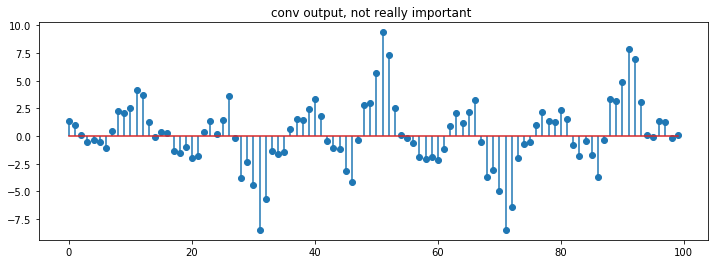

In [158]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
ax.stem(t, conv1d_out[0,0], use_line_collection=True)
ax.set_title('conv output, not really important ')

---

## nn.Conv1d()
- The filter weight is learned through BP

In [183]:
kernel_size = mask_size
conv1d_nn = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=kernel_size, padding=kernel_size//2)
conv1d_nn

Conv1d(2, 1, kernel_size=(15,), stride=(1,), padding=(7,))

In [184]:
conv1d_nn.weight

Parameter containing:
tensor([[[-0.0263,  0.0111,  0.1606, -0.1555,  0.1203,  0.0339,  0.0089,
          -0.0660, -0.1493, -0.0582, -0.1295, -0.1095, -0.1447,  0.1289,
          -0.1002],
         [-0.0566,  0.0440, -0.0402,  0.0682, -0.1484, -0.1490,  0.1332,
           0.1489, -0.0859, -0.0981,  0.1452, -0.0234, -0.1787,  0.0343,
          -0.0732]]], requires_grad=True)

### working test

In [185]:
output = conv1d_nn(input_1d2ch)

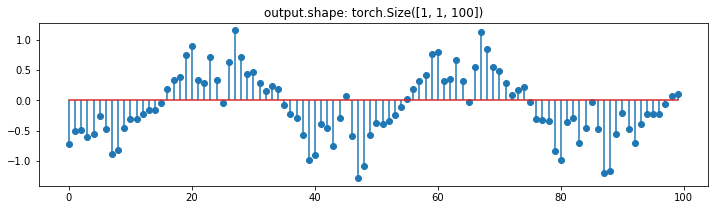

In [186]:
plt.figure(figsize=(12,3))
plt.title(f'output.shape: {output.shape}')
plt.stem(t, output.detach().numpy()[0,0,:], use_line_collection=True);

### let's set the weight parameters to the filter weights we have tested before.
- so that we can compare the output form, just to sure

In [190]:
conv1d_nn.weight.data = filter_1out_2in
output = conv1d_nn(input_1d2ch)

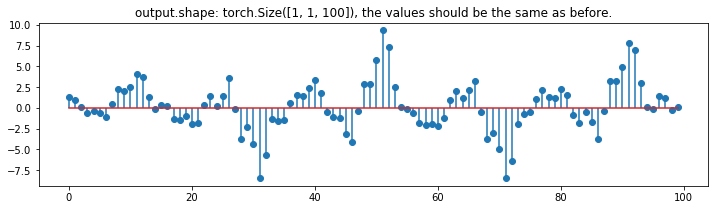

In [195]:
plt.figure(figsize=(12,3))
plt.title(f'output.shape: {output.shape}, the values should be the same as before.')
plt.stem(t, output.detach().numpy()[0,0,:], use_line_collection=True);

In [193]:
output.detach() - conv1d_out

tensor([[[-0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255, -0.0255,
          -0.0255, -0.0255, -0.0255, -0.0255, -0.02

#### Why different?
- look at the manual ...

In [196]:
conv1d_nn.bias

Parameter containing:
tensor([-0.0255], requires_grad=True)

---
## Summary
- 1D convolution with pre-determined filter weights
- Conv1d() as a torch layer to learn the fiter weight with BP

End.